# compare tracks-charecteristics in On-Off beam to Overlay 

In [2]:
import sys; sys.path.insert(0, '../../'); sys.path.insert(0,'../mupClassification/')
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
from matplotlib.pylab import *
import matplotlib.patches as patches
%matplotlib inline

OffBeam_scaling: 0.706423396358 = N(on beam)/N(off beam) before sof. trig.
MC_scaling_DATAcosmic: 0.516400806804 = N(POT on beam)/N(POT MC)


In [104]:
OnBeam = pd.concat([pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/tracks/prod_reco_optfilter_bnb_v11_unblind_mcc8_v04_2018_03_29_tracks.csv')
                     ,pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/tracks/prod_reco_optfilter_bnb_v11_unblind_mcc8_v05_2018_03_29_tracks.csv')])
print len(OnBeam),'tracks from On-Beam'

OffBeam = pd.concat([pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/tracks/prod_reco_optfilter_extbnb_v11_mcc8_dev_v04_2018_03_29_tracks.csv')
                     ,pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/tracks/prod_reco_optfilter_extbnb_v11_mcc8_dev_v05_2018_03_29_tracks.csv')])
print len(OffBeam),'tracks from Off-Beam'

532612 tracks from On-Beam
529756 tracks from Off-Beam


In [105]:
Overlay = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/tracks/ecohen_physical_files_adi_prodgenie_bnb_nu_uboone_overlay_cosmic_data_100K_reco2_2018_03_26_tracks.csv')
print len(Overlay),'tracks from Overlay'

318223 tracks from Overlay


In [122]:
def compare_on_off_to_overaly_1d(bins = linspace(-1,300,41),do_add_legend=True,legend_loc='best'
                                 ,var = 'length',units_scale=1.,ax=None
                                 ,x_label = r'track length [cm]'
                                 ,OnSample = OnBeam,OffSample = OffBeam,MCSample = Overlay
                                 ,do_add_onBeam=False,do_add_offBeam=False):
    OnSample=OnSample[OnSample[var]<np.max(bins)]
    OffSample=OffSample[OffSample[var]<np.max(bins)]
    MCSample=MCSample[MCSample[var]<np.max(bins)]

    mid = 0.5*(bins[1:]+bins[:-1])

    fig = plt.figure(figsize=(10,6))
    if ax is None: ax=fig.add_subplot(111)
    h = dict()
    h['beam-on'],_ = np.histogram( units_scale*OnSample[var], bins=bins )
    if do_add_onBeam==True:
        plt.errorbar(x=mid,xerr=0,y=h['beam-on'],yerr=np.sqrt(h['beam-on']),fmt='o',color='teal',label='on beam')

    h['beam-off'],_ = np.histogram( units_scale*OffSample[var], bins=bins )
    if do_add_offBeam==True:
        plt.errorbar(x=mid,xerr=0,y=OffBeam_scaling*h['beam-off'],yerr=np.sqrt(OffBeam_scaling*h['beam-off']),fmt='o',color='orange',label='Off beam')

    h['on-off'] = h['beam-on'] - OffBeam_scaling*h['beam-off']
    h['on-off err'] = np.sqrt(h['beam-on'] + np.square(OffBeam_scaling)*h['beam-off'])    
    plt.errorbar(x=mid,xerr=0,y=h['on-off'],yerr=h['on-off err'],fmt='o',color='black',label='On-Off beam')


    

    h['overlay'],_ = np.histogram( units_scale*MCSample[var], bins=bins )
    h['POT-scaled MC'] = MC_scaling_DATAcosmic*h['overlay']
    
    h['cosmic in overlay'],_ = np.histogram( units_scale*MCSample[MCSample['pdg']==-9999][var], bins=bins )
    h['POT-scaled cosmic'] = MC_scaling_DATAcosmic*h['cosmic in overlay']

    h['POT-scaled MC err'] = MC_scaling_DATAcosmic*np.sqrt(h['overlay'])
    plt.bar(mid,h['POT-scaled MC'],color='royalblue',alpha=0.5,width=(mid[1]-mid[0]),label='POT-normalized overlay')
    plt.bar(mid,h['POT-scaled cosmic'],color='orange',alpha=0.5,width=(mid[1]-mid[0]),label='cosmic in overlay')
    plt.errorbar(x=mid,xerr=0,y=h['POT-scaled MC'],yerr=h['POT-scaled MC err'],color='royalblue',fmt='o',ms=1,capthick=2,capsize=2)

    set_axes(ax,x_label,'counts',do_add_grid=True,do_add_legend=do_add_legend,xlim=(np.min(bins),np.max(bins)),legend_loc=legend_loc)

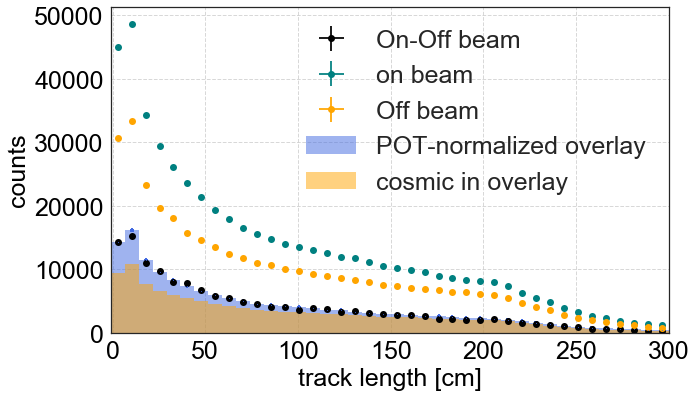

In [123]:
compare_on_off_to_overaly_1d(bins = linspace(-1,300,41)                             
                             ,var = 'length'                             
                             ,x_label = r'track length [cm]'                             
                             ,OnSample = OnBeam,OffSample = OffBeam,MCSample = Overlay
                             ,do_add_offBeam=True,do_add_onBeam=True)

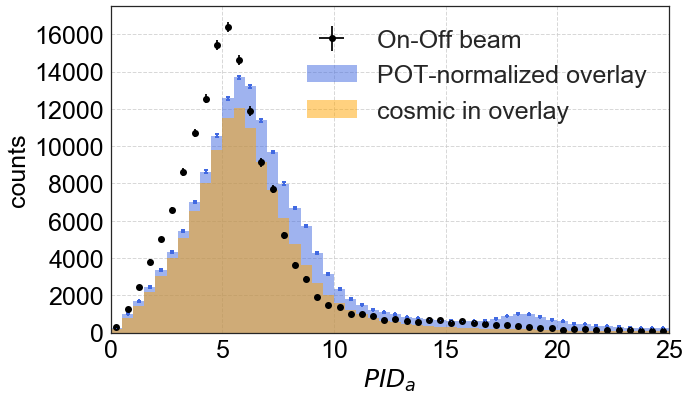

In [108]:
compare_on_off_to_overaly_1d(bins = linspace(0,25,51)
                                 ,var = 'PIDa'
                                 ,x_label = r'$PID_a$'
                                 ,OnSample = OnBeam,OffSample = OffBeam,MCSample = Overlay)

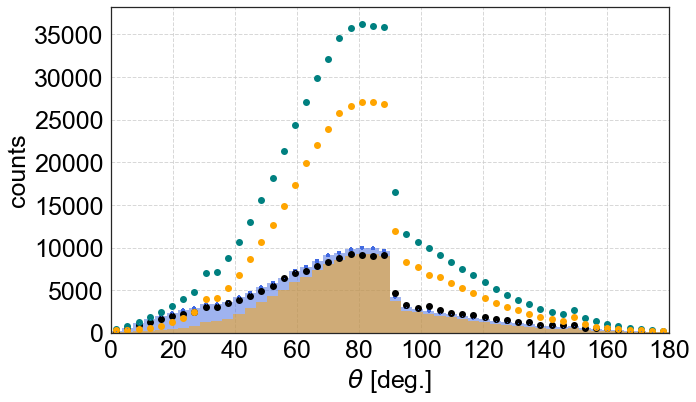

In [124]:
compare_on_off_to_overaly_1d(bins = linspace(0,180,51),do_add_legend=False
                             ,var = 'theta'
                             ,units_scale = 180./np.pi          
                             ,x_label = r'$\theta$ [deg.]'                             
                             ,OnSample = OnBeam,OffSample = OffBeam,MCSample = Overlay
                             ,do_add_offBeam=True,do_add_onBeam=True)

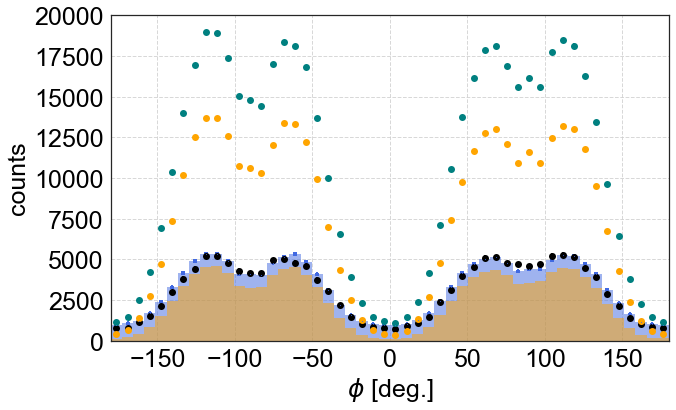

In [125]:
compare_on_off_to_overaly_1d(bins = linspace(-180,180,51),do_add_legend=False
                             ,var = 'phi'
                             ,units_scale = 180./np.pi          
                             ,x_label = r'$\phi$ [deg.]'                             
                             ,OnSample = OnBeam,OffSample = OffBeam,MCSample = Overlay
                             ,do_add_offBeam=True,do_add_onBeam=True)

# Let us try to lock on tracks that are fully contained in a smaller region of the detector

In [111]:
def tracks_in_FV(sample=None
                 ,xmin=80,xmax=150
                 ,ymin=-40,ymax=50
                 ,zmin=200,zmax=800):
    print len(sample),'before FV'
    sample =  sample[(sample['start_x']>xmin) & (sample['start_x']<xmax)
                     &(sample['start_y']>ymin) & (sample['start_y']<ymax)
                     &(sample['start_z']>zmin) & (sample['start_z']<zmax)
                     &(sample['end_x']>xmin) & (sample['end_x']<xmax)
                     &(sample['end_y']>ymin) & (sample['end_y']<ymax)
                     &(sample['end_z']>zmin) & (sample['end_z']<zmax)]
    print len(sample),'after FV'
    return sample

In [112]:
OnBeam_FV = tracks_in_FV(OnBeam)
OffBeam_FV = tracks_in_FV(OffBeam)
Overlay_FV = tracks_in_FV(Overlay)

532612 before FV
5015 after FV
529756 before FV
4381 after FV
318223 before FV
3970 after FV


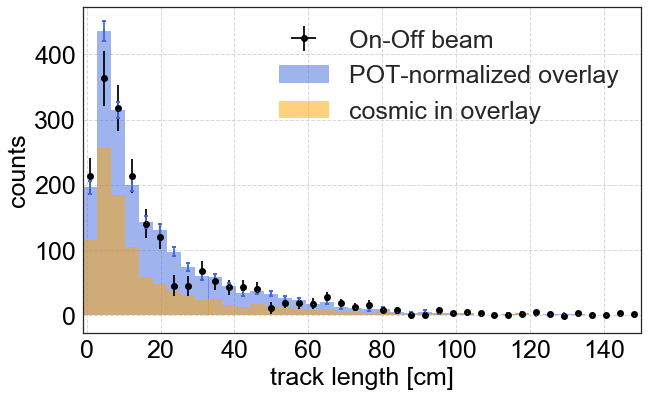

In [113]:
compare_on_off_to_overaly_1d(bins = linspace(-1,150,41)
                                 ,var = 'length'
                                 ,x_label = r'track length [cm]'
                                 ,OnSample = OnBeam_FV,OffSample = OffBeam_FV,MCSample = Overlay_FV)

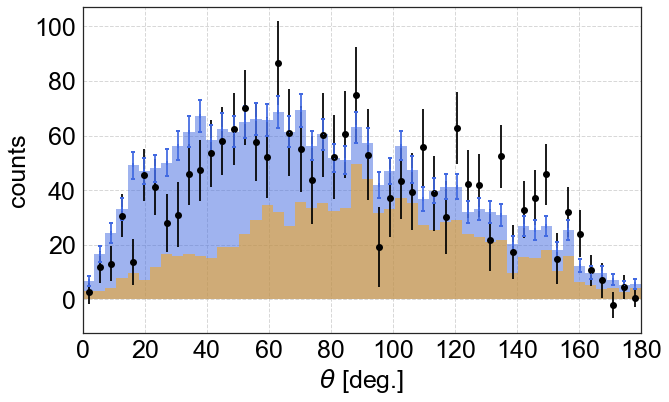

In [114]:
compare_on_off_to_overaly_1d(bins = linspace(0,180,51),do_add_legend=False
                             ,var = 'theta'
                             ,units_scale = 180./np.pi          
                             ,x_label = r'$\theta$ [deg.]'                             
                             ,OnSample = OnBeam_FV,OffSample = OffBeam_FV,MCSample = Overlay_FV)

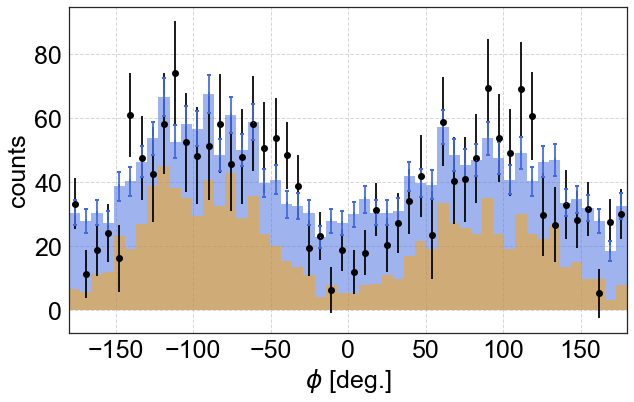

In [115]:
compare_on_off_to_overaly_1d(bins = linspace(-180,180,51),do_add_legend=False
                             ,var = 'phi'
                             ,units_scale = 180./np.pi          
                             ,x_label = r'$\phi$ [deg.]'                             
                             ,OnSample = OnBeam_FV,OffSample = OffBeam_FV,MCSample = Overlay_FV)